In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
# print(tf.__version__)
# print(sys.version_info)
# for module in mpl,np,pd,sklearn,tf,keras:
#     print(module.__name__, module.__version__)

In [3]:
fashion_minist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_minist.load_data()
x_vaild, x_train = x_train_all[:5000], x_train_all[5000:]
y_vaild, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_vaild.shape, y_vaild.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_vaild = scaler.fit_transform(x_vaild.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test = scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [8]:
print(np.max(x_train),np.min(x_train))

2.0231433 -0.8105136


In [9]:
# 使用tf.keras.sequential构建模型
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='tanh'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_vaild,y_vaild))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.5445 - accuracy: 0.8111 - val_loss: 0.4497 - val_accuracy: 0.8382
Epoch 2/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3943 - accuracy: 0.8582 - val_loss: 0.3695 - val_accuracy: 0.8710
Epoch 3/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3542 - accuracy: 0.8730 - val_loss: 0.3508 - val_accuracy: 0.8756
Epoch 4/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3304 - accuracy: 0.8821 - val_loss: 0.3418 - val_accuracy: 0.8740
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3117 - accuracy: 0.8884 - val_loss: 0.3236 - val_accuracy: 0.8840
Epoch 6/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.2960 - accuracy: 0.8935 - val_loss: 0.3222 - val_accuracy: 0.8842
Epoch 7/10
55000/55000 [==============================] 

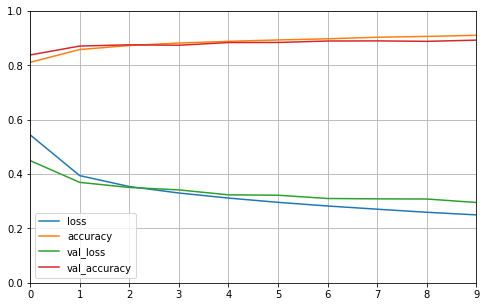

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)